[View in Colaboratory](https://colab.research.google.com/github/Iamalos/deep-learning-with-python-notebooks/blob/master/DP_with_Keras,_Intro.ipynb)

In [0]:
from keras.datasets import mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
print(train_images.shape)
print(train_labels)

(60000, 28, 28)
[5 0 4 ... 5 6 8]


In [7]:
print(test_images.shape)
print(test_labels)

(10000, 28, 28)
[7 2 1 ... 4 5 6]


In [0]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def displayRandomImages(images, labels = None, size = 3):
  random_idxs = np.random.choice(len(images),size)
  num_cols = 5
  num_rows = int(np.ceil(size / num_cols))
  fig, axs = plt.subplots(num_rows, num_cols)
  axs = axs.ravel()
  for i in range(size):
    axs[i].imshow(images[random_idxs[i]], cmap = plt.cm.binary)
    axs[i].axis('off')

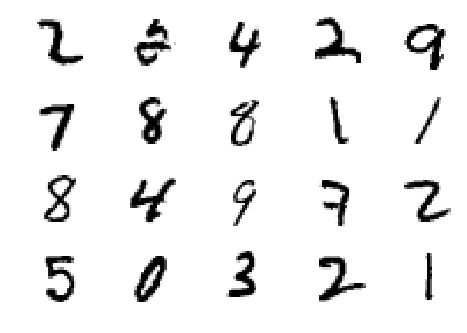

In [113]:
displayRandomImages(train_images, size = 20)

In [0]:
from keras import models
from keras import layers

In [0]:
# Network architecture
network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
network.add(layers.Dense(10, activation=  'softmax'))

In [0]:
network.compile(optimizer = 'rmsprop', 
                loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])

In [0]:
# Transform data
train_images = train_images.reshape((-1, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((-1, 28*28))
test_images = test_images.astype('float32') / 255

In [0]:
# Encode labels
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [107]:
# Train the network
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.2557 - acc: 0.9264
Epoch 2/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.1033 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.0689 - acc: 0.9788
Epoch 4/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.0500 - acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.0372 - acc: 0.9892


In [108]:
# Evaluate performance
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 67us/step
test_acc: 0.978
